<h1>直近1年間の株価取得</h1>

In [20]:
#ライブラリのインポート
import datetime
import pandas as pd
import pandas_datareader.data as pdd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [21]:
#今回はNFLXを取得
stock_symbol = input() 

NFLX


In [22]:
#直近1年間の株価を取得するために、今日の日付からtimedeltaで１年間ずらしたデータを生成
today = datetime.datetime.today()
before_y = today - datetime.timedelta(days= 365)

#その後変数の可読性を上げるため変数名を変更
start_date, end_date =before_y, today
financial_data = pd.DataFrame()
financial_data[stock_symbol] = pdd.DataReader(stock_symbol, data_source='yahoo', start = start_date, end = end_date)['Adj Close'] 
financial_data

,NFLX
Date,
2019-10-14,285.529999
2019-10-15,284.250000
2019-10-16,286.279999
2019-10-17,293.350006
2019-10-18,275.299988
...,...
2020-10-05,520.650024
2020-10-06,505.869995
2020-10-07,534.659973


<h1>株価の描画</h1>

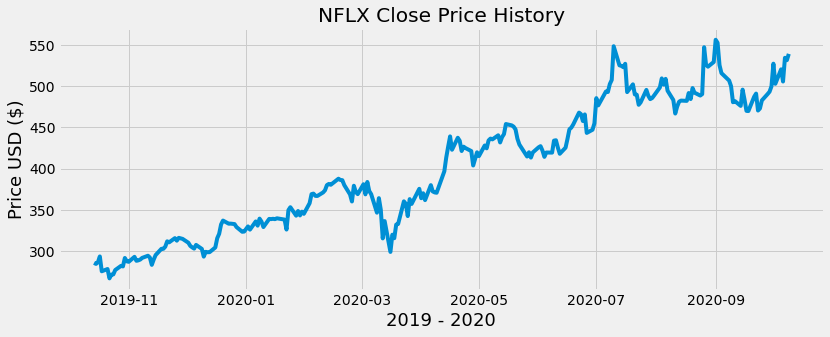

In [27]:
#グラフの描画
plt.figure(figsize=(12.2,4.5))
plt.plot(financial_data.index,financial_data[stock_symbol],  label='Close Price')
plt.title(f'{stock_symbol} Close Price History')
plt.xlabel('2019 - 2020',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

<h1>RSIの計算と描画</h1>

In [24]:
#RSIの計算
delta = financial_data[stock_symbol].diff(1) 
delta = delta.dropna() 
up =  delta.copy() 
down = delta.copy() 
up[up < 0] = 0 
down[down > 0] = 0 
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

C:\Users\densu\anaconda3\envs\numpyenv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


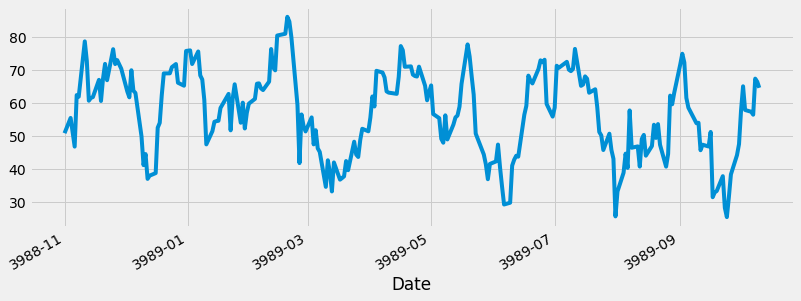

In [26]:
#RSIの描画
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

<h1>まとめて描画して比較する</h1>

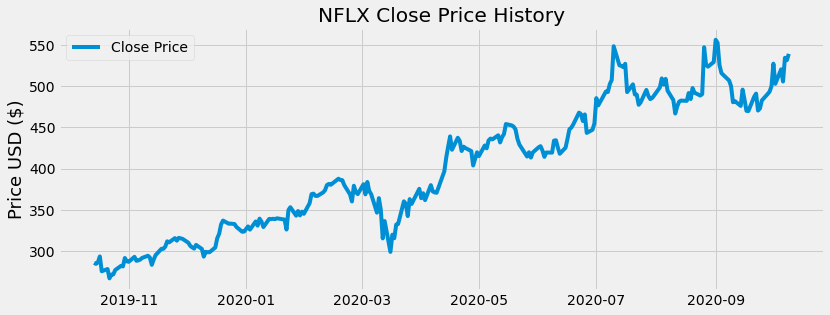

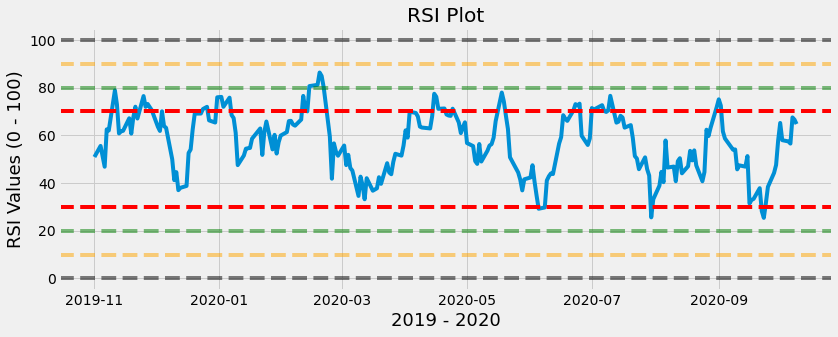

In [28]:
new_df = pd.DataFrame()
new_df['Close Price'] = financial_data[stock_symbol]
new_df['RSI'] = RSI
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Close Price'])
plt.title(f'{stock_symbol} Close Price History')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(new_df.columns.values, loc='upper left')
plt.show()
plt.figure(figsize=(12.33,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(10, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(30, linestyle='--',color = 'red')
plt.axhline(70, linestyle='--', color = 'red')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(90, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(100, linestyle='--', alpha=0.5, color = 'black')
plt.xlabel('2019 - 2020',fontsize=18)
plt.ylabel('RSI Values (0 - 100)',fontsize=18)
plt.show()